In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [18]:
df = pd.read_csv("Experimento_Helicopteros.csv", sep=',')
df.head()

,altura (cm),wing length (cm),body width (cm),body length (cm),tiempo (s)
0,445,3.9,2.4,7.8,2.27
1,445,3.9,2.4,7.8,2.31
2,445,3.9,2.4,7.8,2.09
3,445,3.9,2.4,7.8,2.58
4,445,3.9,2.4,7.8,2.40


Se observa una relacion lineal bastante clara entre largo de las alas y tiempo de caida.

/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype)

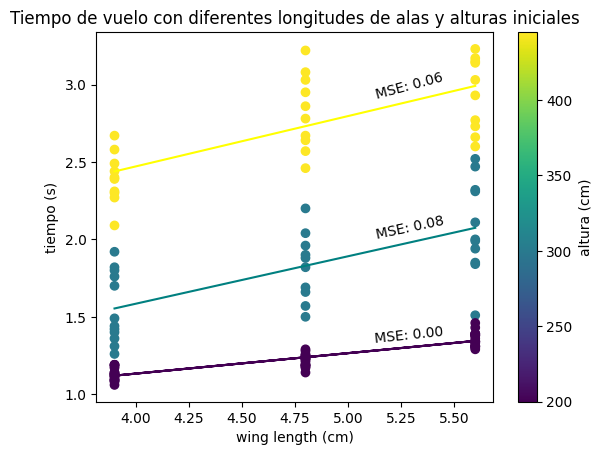

In [120]:
plt.scatter(df['wing length (cm)'], df['tiempo (s)'], c=df['altura (cm)'], cmap='viridis')
plt.colorbar(label='altura (cm)')
plt.xlabel('wing length (cm)')
plt.ylabel('tiempo (s)')
plt.title('Tiempo de vuelo con diferentes longitudes de alas y alturas iniciales')

# Conjuntos de datos para cada altura
df_low = df[df['altura (cm)'] == 200]
df_med = df[df['altura (cm)'] == 300]
df_high = df[df['altura (cm)'] == 445]

linear_model = LinearRegression()

# Regresion para 200 cm
x = df_low['wing length (cm)']
y = df_low['tiempo (s)']
# Ajuste del modelo
linear_model.fit(x.values.reshape(-1, 1), y)
y_pred = linear_model.predict(x.values.reshape(-1, 1))
plt.plot(x, y_pred, label='200 cm', color='#440154')
# Calculo de MSE con validacion cruzada
scores_linear = cross_val_score(linear_model, x.values.reshape(-1, 1), y, cv=5, scoring='neg_mean_squared_error')
mse = -np.mean(scores_linear)  # Negate the MSE from cross_val_score
plt.text(0.7, 0.16, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, rotation=6)

# Regresion para 300 cm
x = df_med['wing length (cm)']
y = df_med['tiempo (s)']
# Ajuste del modelo
linear_model.fit(x.values.reshape(-1, 1), y)
y_pred = linear_model.predict(x.values.reshape(-1, 1))
plt.plot(x, y_pred, label='300 cm', color='teal')
# Calculo de MSE con validacion cruzada
scores_linear = cross_val_score(linear_model, x.values.reshape(-1, 1), y, cv=5, scoring='neg_mean_squared_error')
mse = -np.mean(scores_linear)
plt.text(0.7, 0.44, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, rotation=12)

# Regresion para 445 cm
x = df_high['wing length (cm)']
y = df_high['tiempo (s)']
# Ajuste del modelo
linear_model.fit(x.values.reshape(-1, 1), y)
y_pred = linear_model.predict(x.values.reshape(-1, 1))
plt.plot(x, y_pred, label='445 cm', color='yellow')
# Calculo de MSE con validacion cruzada
scores_linear = cross_val_score(linear_model, x.values.reshape(-1, 1), y, cv=5, scoring='neg_mean_squared_error')
mse = -np.mean(scores_linear)
plt.text(0.7, 0.82, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, rotation=15)


plt.show()


No parece haber una diferencia notable entre diferentes valores de ancho del cuerpo, pero faltan observaciones desde alturas iniciales mas altas para poder observar mejor su relacion

/tmp/ipykernel_13396/22330860.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_low['body width (cm)'], df_low['tiempo (s)'], cmap='viridis')
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.

Text(0.5, 0.48, 'MSE: 0.02')

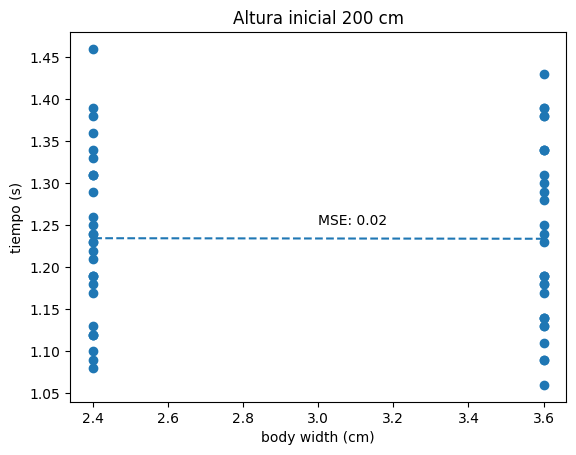

In [129]:
plt.scatter(df_low['body width (cm)'], df_low['tiempo (s)'], cmap='viridis')
plt.xlabel('body width (cm)')
plt.ylabel('tiempo (s)')
plt.title('Altura inicial 200 cm')

# Regresion para 200 cm
x = df_low['body width (cm)']
y = df_low['tiempo (s)']
# Ajuste del modelo
linear_model.fit(x.values.reshape(-1, 1), y)
y_pred = linear_model.predict(x.values.reshape(-1, 1))
plt.plot(x, y_pred, label='200 cm', linestyle='--')
# Calculo de MSE con validacion cruzada
scores_linear = cross_val_score(linear_model, x.values.reshape(-1, 1), y, cv=5, scoring='neg_mean_squared_error')
mse = -np.mean(scores_linear)  # Negate the MSE from cross_val_score
plt.text(0.5, 0.48, f'MSE: {mse:.2f}', transform=plt.gca().transAxes)

Tambien es clara la relacion entre altura y tiempo de caida

/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype)

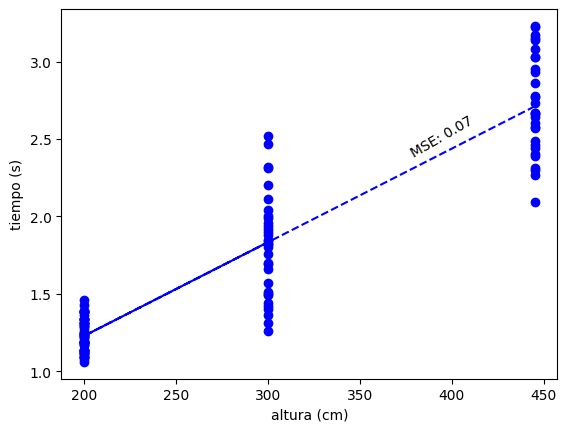

In [125]:
plt.scatter(df['altura (cm)'],df['tiempo (s)'], color='blue')
plt.xlabel('altura (cm)')
plt.ylabel('tiempo (s)')

x = df['altura (cm)']
y = df['tiempo (s)']
linear_model.fit(x.values.reshape(-1, 1), y)
y_pred = linear_model.predict(x.values.reshape(-1, 1))
plt.plot(x, y_pred, label='200 cm', linestyle='--', color='blue')
scores_linear = cross_val_score(linear_model, x.values.reshape(-1, 1), y, cv=5, scoring='neg_mean_squared_error')
mse = -np.mean(scores_linear)
plt.text(0.7, 0.6, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, rotation=30)

plt.show()

Al realizar validacion cruzada a partir de una ajuste hecho con todas las variables se obtienen tambien buenos resultados, indicando un muy buen poder predictivo del ajuste lineal

/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, p

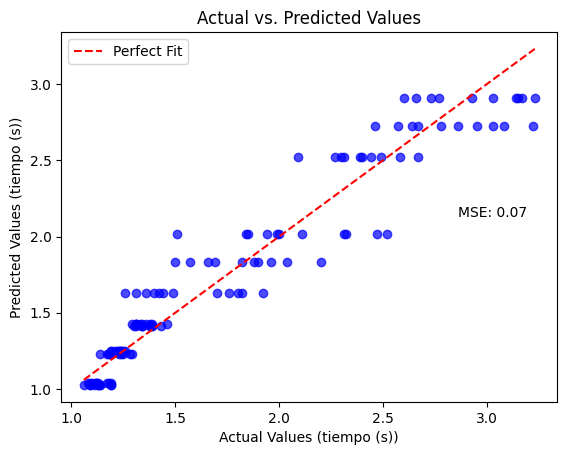

In [112]:
X = df[['altura (cm)', 'wing length (cm)', 'body width (cm)', 'body length (cm)']]
y = df['tiempo (s)']

model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

plt.scatter(y, y_pred, color='blue', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Fit')  # Perfect fit line
plt.xlabel('Actual Values (tiempo (s))')
plt.ylabel('Predicted Values (tiempo (s))')
plt.title('Actual vs. Predicted Values')
scores_linear = cross_val_score(linear_model, x.values.reshape(-1, 1), y, cv=5, scoring='neg_mean_squared_error')
mse = -np.mean(scores_linear)
plt.text(0.8, 0.5, f'MSE: {mse:.2f}', transform=plt.gca().transAxes)

plt.legend()
plt.show()

Se grafica el MSE obtenido por KNN para diferentes valores de k, se observa que el menor MSE se obtiene con k=7, aproximadamente la cantidad de mediciones hechas para cada configuracion del helicoptero

/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, p

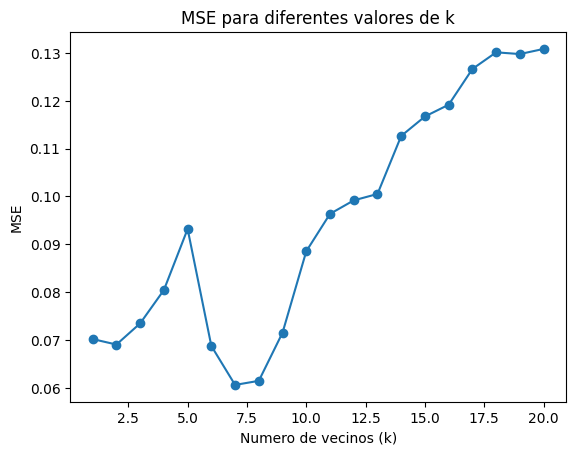

In [ ]:
X = df[['altura (cm)','wing length (cm)', 'body width (cm)', 'body length (cm)']]
y = df['tiempo (s)']

# Inicializacion de listas para guardar los valores de k y MSE
k_values = list(range(1, 21))
mse_scores = []

# Loop through each value of k
for k in k_values:
    # Inicializacion de knn con k vecinos
    knn = KNeighborsRegressor(n_neighbors=k)
    # Calculo de MSE con validacion cruzada
    scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
    mse = -np.mean(scores)
    mse_scores.append(mse)

# Graficacion de los resultados
plt.plot(k_values, mse_scores, marker='o')
plt.xlabel('Numero de vecinos (k)')
plt.ylabel('MSE')
plt.title('MSE para diferentes valores de k')
plt.show()


El MSE obtenido por ambos metodos es muy similar, indicando un poder predictivo muy comparable entre ellos